# COGS 108 Final Project

# Overview

Behavior is a known risk factor that is associated with drug use, from something commonly consumed like chocolate to more illicit substances like heroin. This project is exploring a dataset on drug consumption to understand how personality, namely the impulsiveness trait, influences drug consumption. While there have been other studies that have researched the relationship between personality and drug consumption, they have been focused on multiple personality traits and their effects on public health. With our data science skills, our project has classified different tiers of drugs and how impulsiveness affects their consumption. 

## Names

- Jeffrey Lee
- Hayden Telson
- Emily Nguyen
- Amar Paul
- Jeremy Borja

## Group Members IDs

- A13006772
- A14766000
- A12895529
- A13583384
- A12747971

# Research Question

One of the personality attributes studied in our dataset is BIS-11 which assesses the impulsiveness of an individual. How does this attribute affect frequency of drug consumption?  Does impulsiveness affect the intensity of the drugs consumed? 

## Background and Prior Work

When thinking about drug usage, the first thought that may come to mind is the correlation between illicit drug use and negative behaviors. While this can potentially be true, we must also not forget to acknowledge the wider range of what is considered drugs, including alcoholic and caffeinated substances. Whether a drug is considered legal or illegal, one thing is certain; drug consumption has an effect on an individual’s personality traits. The recognition of this effect has stimulated numerous studies to develop an understanding of this relationship. 

Like many research projects on the potential links between personality and drug use, our dataset also examined the five variables within the five-factor model of personality: openness to experience, conscientiousness, extraversion, agreeableness, and neuroticism. Combined with the wide array of drug and demographic data for each subject, we have a detailed dataset focused primarily on a subject’s personality, their drug habits, and their demographic factors.

Existing research on this topic often cover the influence of personality traits on drug consumption as a whole. Additionally, this research has found relationships between impulsivity, conscientiousness, and neuroticism. The main takeaways of two differing projects related to this topic that we found are listed below.

References:
- 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2373294/
     - Five-Factor Model personality profiles of drug users
     - Personality traits are considered risk factors for drug use, and in turn, drug use impact personality traits 
     - Link between drug use and low conscientiousness 
     - Current cigarette smokers score lower on conscientiousness and higher on neuroticism than never smokers 
     - Cocaine/heroin users score very high on neuroticism and very low on conscientiousness 
     - Marijuana users score high on openness to experience, average on neuroticism, but low on agreeableness and 
       conscientiousness

- 2) http://www.midus.wisc.edu/findings/pdfs/1208.pdf 
     - Personality and substance use in midlife: Conscientiousness as a moderator and the effects of trait change 
     - Agrees with former article, higher conscientiousness results in lower illegal drug use and lower drug use in general 
     - More specifically, conscientiousness moderates the effects of neuroticism and extraversion 
     - Personality changes on a timescale of years are just as important as personality traits in predicting substance-use 
       behavior

# Hypothesis

We predict that impulsive behavior is related to creating more frequent drug use. Due to the relationship discovered in previous research between low conscientiousness and impulsivity, a frequent drug user has reduced their self-discipline and increased desire to seek excitement. 

# Dataset(s)

- Dataset Name: Drug Consumption (quantified)
- Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+(quantified)
- Number of observations: 1885
- Description: This dataset contains a broad array of self-reported and scored information from 1885 subjects on themselves and their drug consumption habits. Data ranges from socioeconomic factors (such as age bracket and level of education), to personal factors (such as impulsivity and agreeability), to estimated drug consumption frequency (based on when a specific type of drug was last ingested).

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Column order is in the same order as the categories are listed on the UCI ML dataset page              |
drug_col_names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism Score', 
                  'Extraversion Score', 'Openness Score', 'Agreeableness Score', 
                  'Conscientiousness Score', 'Impulsiveness Score', 'Sensation Seeking Score', 
                  'Alcohol Consumption', 'Amphetamine Consumption', 'Amyl Nitrite Consumption',
                  'Benzodiazepene Consumption', 'Caffeine Consumption', 'Cannabis Consumption', 
                  'Chocolate Consumption', 'Cocaine Consumption', 'Crack Consumption', 
                  'Ecstasy Consumption', 'Heroin Consumption', 'Ketamine Consumption', 
                  'Legal High Consumption', 'LSD Consumption', 'Methadone Consumption', 
                  'Magic Mushroom Consumption', 'Nicotine Consumption', 'Semeron Consumption', 
                  'Volatile Substance Consumption']
drug_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data',
                 header=None, names=drug_col_names)

# Data Cleaning

Most data within the dataset is categorical in nature, but of seemingly arbitrarry decimal values. Therefore, not much cleaning is required outside of standardizing the categorical variables into clearer, all-positive integer distinctions.

1. Numerous categorization functions were defined to handle each category's arbitrarily selected values. The categories that 
   were cleaned in this way were: Age, Gender, Education, Country of Residence, Ethnicity, and level of drug consumption. Each 
   respective column in the dataset was cleaned with its specific categorization function.
2. Afterwards, the 'cleaned' dataset was then scanned to ensure that all of its values fell within the expected standardized 
   categorical values such that there would be no unexpected outlier that was left unmodified post-cleaning.

###  Categorization Functions to make data in dataframe easier to interpret ###

In [3]:
def categorize_age(age):
    # Categorization: Ages 18-24 = '1'
    #                 Ages 25-34 = '2'
    #                 Ages 35-44 = '3'
    #                 Ages 45-54 = '4'
    #                 Ages 55-64 = '5'
    #                 Ages 65+   = '6'
    if(age == -0.9519700000000001):
        return 1
    if(age == -0.07854):
        return 2
    if(age == 0.49788000000000004):
        return 3
    if(age == 1.09449):
        return 4
    if(age == 1.82213):
        return 5
    if(age == 2.59171):
        return 6
    return age

In [4]:
def categorize_gender(gender):
    # Categorization: Female = '1'
    #                 Male   = '2'
    if(gender == 0.48246000000000006):
        return 1
    elif(gender == -0.48246000000000006):
        return 2
    return gender

In [5]:
def categorize_education(education):
    # Categorization: Left school before 16 years                          = '1'
    #                 Left school at 16 years                              = '2'
    #                 Left school at 17 years                              = '3'
    #                 Left school at 18 years                              = '4'
    #                 Some college or university, no certificate or degree = '5'
    #                 Professional certificate/ diploma                    = '6'
    #                 University degree                                    = '7'
    #                 Masters degree                                       = '8'
    #                 Doctorate degree                                     = '9'
    if(education == -2.43591):
        return 1
    elif(education == -1.73790):
        return 2
    elif(education == -1.43719):
        return 3
    elif(education == -1.22751):
        return 4
    elif(education == -0.6111300000000001):
        return 5
    elif(education == -0.059210000000000006):
        return 6
    elif(education == 0.45468000000000003):
        return 7
    elif(education == 1.16365):
        return 8
    elif(education == 1.98437):
        return 9
    return education

In [6]:
def categorize_country(country):
    # Categorization: Australia           = '1'
    #                 Canada              = '2'
    #                 New Zealand         = '3'
    #                 Other               = '4'
    #                 Republic of Ireland = '5'
    #                 UK                  = '6'
    #                 USA                 = '7'
    if(country == -0.09765):
        return 1
    elif(country == 0.24923):
        return 2
    elif(country == -0.46841000000000005):
        return 3
    elif(country == -0.28519):
        return 4
    elif(country == 0.21128000000000002):
        return 5
    elif(country == 0.9608200000000001):
        return 6
    elif(country == -0.57009):
        return 7
    return country

In [7]:
def categorize_ethnicity(ethnicity):
    # Categorization: Asian             = '1'
    #                 Black             = '2'
    #                 Mixed-Black/Asian = '3'
    #                 Mixed-White/Asian = '4'
    #                 Mixed-White/Black = '5'
    #                 Other             = '6'
    #                 White             = '7'
    if(ethnicity == -0.50212):
        return 1
    elif(ethnicity == -1.1070200000000001):
        return 2
    elif(ethnicity == 1.90725):
        return 3
    elif(ethnicity == 0.12600):
        return 4
    elif(ethnicity == -0.22166):
        return 5
    elif(ethnicity == 0.11440):
        return 6
    elif(ethnicity == -0.31685):
        return 7
    return ethnicity

In [8]:
def categorize_drug(drug):
    # Categorization: Never             = '1'
    #                 Over 10 year      = '2'
    #                 Last Decade       = '3'
    #                 Last Year         = '4'
    #                 Last Month        = '5'
    #                 Last Week         = '6'
    #                 Last Day          = '7'
    if (drug == 'CL0'):
        return 1
    elif (drug == 'CL1'):
        return 2
    elif (drug == 'CL2'):
        return 3
    elif (drug == 'CL3'):
        return 4
    elif (drug == 'CL4'):
        return 5
    elif (drug == 'CL5'):
        return 6
    elif (drug == 'CL6'):
        return 7
    return drug

In [9]:
# Clean up categorical data into nicer numbers
drug_df['Age'] = drug_df['Age'].apply(categorize_age)
drug_df['Gender'] = drug_df['Gender'].apply(categorize_gender)
drug_df['Education'] = drug_df['Education'].apply(categorize_education)
drug_df['Country'] = drug_df['Country'].apply(categorize_country)
drug_df['Ethnicity'] = drug_df['Ethnicity'].apply(categorize_ethnicity)
drug_df['Alcohol Consumption'] = drug_df['Alcohol Consumption'].apply(categorize_drug)
drug_df['Amphetamine Consumption'] = drug_df['Amphetamine Consumption'].apply(categorize_drug)
drug_df['Amyl Nitrite Consumption'] = drug_df['Amyl Nitrite Consumption'].apply(categorize_drug)
drug_df['Benzodiazepene Consumption'] = drug_df['Benzodiazepene Consumption'].apply(categorize_drug)
drug_df['Caffeine Consumption'] = drug_df['Caffeine Consumption'].apply(categorize_drug)
drug_df['Cannabis Consumption'] = drug_df['Cannabis Consumption'].apply(categorize_drug)
drug_df['Chocolate Consumption'] = drug_df['Chocolate Consumption'].apply(categorize_drug)
drug_df['Cocaine Consumption'] = drug_df['Cocaine Consumption'].apply(categorize_drug)
drug_df['Crack Consumption'] = drug_df['Crack Consumption'].apply(categorize_drug)
drug_df['Ecstasy Consumption'] = drug_df['Ecstasy Consumption'].apply(categorize_drug)
drug_df['Heroin Consumption'] = drug_df['Heroin Consumption'].apply(categorize_drug)
drug_df['Ketamine Consumption'] = drug_df['Ketamine Consumption'].apply(categorize_drug)
drug_df['Legal High Consumption'] = drug_df['Legal High Consumption'].apply(categorize_drug)
drug_df['LSD Consumption'] = drug_df['LSD Consumption'].apply(categorize_drug)
drug_df['Methadone Consumption'] = drug_df['Methadone Consumption'].apply(categorize_drug)
drug_df['Magic Mushroom Consumption'] = drug_df['Magic Mushroom Consumption'].apply(categorize_drug)
drug_df['Nicotine Consumption'] = drug_df['Nicotine Consumption'].apply(categorize_drug)
drug_df['Semeron Consumption'] = drug_df['Semeron Consumption'].apply(categorize_drug)
drug_df['Volatile Substance Consumption'] = drug_df['Volatile Substance Consumption'].apply(categorize_drug)

In [10]:
# Check to make sure each column has been processed correctly w/o outliers
assert sorted(set(drug_df['Age'])) == [1, 2, 3, 4, 5, 6]
assert sorted(set(drug_df['Gender'])) == [1, 2]
assert sorted(set(drug_df['Education'])) == [1, 2, 3, 4, 5, 6, 7, 8, 9]
assert sorted(set(drug_df['Country'])) == [1, 2, 3, 4, 5, 6, 7]
assert sorted(set(drug_df['Ethnicity'])) == [1, 2, 3, 4, 5, 6, 7]

In [11]:
drug_df

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism Score,Extraversion Score,Openness Score,Agreeableness Score,...,Ecstasy Consumption,Heroin Consumption,Ketamine Consumption,Legal High Consumption,LSD Consumption,Methadone Consumption,Magic Mushroom Consumption,Nicotine Consumption,Semeron Consumption,Volatile Substance Consumption
0,1,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,...,1,1,1,1,1,1,1,3,1,1
1,2,2,2,9,6,7,-0.67825,1.93886,1.43533,0.76096,...,5,1,3,1,3,4,1,5,1,1
2,3,3,2,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,...,1,1,1,1,1,1,2,1,1,1
3,4,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,...,1,1,3,1,1,1,1,3,1,1
4,5,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,...,2,1,1,2,1,1,3,3,1,1
5,6,6,1,4,2,7,-0.67825,-0.30033,-1.55521,2.03972,...,1,1,1,1,1,1,1,7,1,1
6,7,4,2,8,7,7,-0.46725,-1.09207,-0.45174,-0.30172,...,1,1,1,1,1,1,1,7,1,1
7,8,3,2,2,6,7,-1.32828,1.93886,-0.84732,-0.30172,...,1,1,1,1,1,1,1,1,1,1
8,9,3,1,6,2,7,0.62967,2.57309,-0.97631,0.76096,...,1,1,1,1,1,1,1,7,1,1
9,10,5,2,8,6,7,-0.24649,0.00332,-1.42424,0.59042,...,1,1,1,1,1,1,1,7,1,1


# Data Analysis & Results

Exploratory Analysis
------------------------

We begain our exploratory analysis by creating functions that would take in each drug type and return the frequency at which each drug was used, in addition to the overall percentage of participants that gave that response. This allowed us to get an initial look at drug trend that we could then expand on with further analysis. 

In [13]:
#Analysis to find the frequency individuals take Ecstasy

#Function to count the frequencies of drug use

#Declare function that takes in dataframe column
def countDrugFreq(df, drugType, printResults=False):

    #Create variables to hold different rates
    neverUsed = 0
    overADecade = 0
    lastDecade = 0
    lastYear = 0
    lastMonth = 0
    lastWeek = 0
    lastDay = 0
    totalCount = 0
        
    #Loop through column to count up frequency
    for x in drug_df[drugType]:
        if x == 1:
            neverUsed += 1
        elif x == 2:
            overADecade += 1
        elif x == 3:
            lastDecade += 1
        elif x == 4:
            lastYear += 1
        elif x == 5:
            lastMonth += 1
        elif x == 6:
            lastWeek += 1
        elif x == 7:
            lastDay += 1
        totalCount += 1
    
    #Frequency Values Array to be returned 
    freqValues = [neverUsed, overADecade, lastDecade, lastYear, lastMonth, lastWeek, lastDay]
    
    #Calculate percentages
    neverUsedPercent = (neverUsed / totalCount)
    overADecadePercent = (overADecade / totalCount)
    lastDecadePercent = (lastDecade / totalCount)
    lastYearPercent = (lastYear / totalCount)
    lastMonthPercent = (lastMonth / totalCount)
    lastWeekPercent = (lastWeek / totalCount)
    lastDayPercent = (lastDay / totalCount)
    
    #Frequency Percentages Array to be returned
    freqPercents = [neverUsedPercent, overADecadePercent, lastDecadePercent, 
                    lastYearPercent, lastMonthPercent, lastWeekPercent, lastDayPercent]

    #Print out the counts and percentages if desired
    if(printResults):
        print ("Results of", drugType)
        print ("-------------------------------------------")
        print ("Number of participants that never used:", neverUsed)
        print ("Number of participants that used over a decade ago:", overADecade)
        print ("Number of participants that used in the last decade:", lastDecade)
        print ("Number of participants that used in the last year:", lastYear)
        print ("Number of participants that used in the last month:", lastMonth)
        print ("Number of participants that used in the last week:", lastWeek)
        print ("Number of participants that used in the last day:", lastDay)
    
        #Print an empty line before percentages
        print()
    
        print (drugType, "Percentages:")
        print ("-------------------------------------------")
        print ("Percent of participants that never used: {0:.0%}".format(neverUsedPercent))
        print ("Percent of participants that used over a decade ago: {0:.0%}".format(overADecadePercent))
        print ("Percent of participants that used in the last decade: {0:.0%}".format(lastDecadePercent))
        print ("Percent of participants that used in the last year: {0:.0%}".format(lastYearPercent))
        print ("Percent of participants that used in the last month: {0:.0%}".format(lastMonthPercent))
        print ("Percent of participants that used in the last week: {0:.0%}".format(lastWeekPercent))
        print ("Percent of participants that used in the last day: {0:.0%}".format(lastDayPercent))
        
    return [freqValues, freqPercents]

In [14]:
#Create a function to draw the frequency bar charts
def printFreqPlot(List, title):
    labels = ('Never', '>Decade', 'Decade', 'Year', 'Month', 'Week', 'Day')
    y_pos = np.arange(len(labels))
    values = List
    plt.bar(y_pos, values, align='center', alpha=1.0)
    plt.xticks(y_pos, labels)
    plt.ylabel('Frequency')
    plt.title("%s Rate of Usage" % title)

    plt.show()

In [15]:
#Create funtion to create pie charts from percentages
def printPieChart(List, title):
    labels = 'Never', '>Decade', 'Decade', 'Year', 'Month', 'Week', 'Day'
    values = List
    colors = ['gold', 'yellowgreen', 'goldenrod', 'lightskyblue', 'royalBlue', 'mediumspringgreen', 'crimson']
    
    plt.pie(values, labels=labels, colors=colors, startangle=140)
    plt.axis('equal')
    plt.title("%s Rate of Usage" % title)
    plt.show()

In [16]:
#Get drug counts and percentages for each drug to make graphs out of
alcoholCounts, alcoholPercents = countDrugFreq(drug_df, 'Alcohol Consumption')
methCounts, methPercents = countDrugFreq(drug_df, 'Amphetamine Consumption')
amylCounts, amylPercents = countDrugFreq(drug_df, 'Amyl Nitrite Consumption')
benzoCounts, benzoPercents = countDrugFreq(drug_df, 'Benzodiazepene Consumption')
caffeineCounts, caffeinePercents = countDrugFreq(drug_df, 'Caffeine Consumption')
weedCounts, weedPercents = countDrugFreq(drug_df, 'Cannabis Consumption')
chocCounts, chocPercents = countDrugFreq(drug_df, 'Chocolate Consumption')
cokeCounts, cokePercents = countDrugFreq(drug_df, 'Cocaine Consumption')
crackCounts, crackPercents = countDrugFreq(drug_df, 'Crack Consumption')
ecstasyCounts, ecstasyPercents = countDrugFreq(drug_df, 'Ecstasy Consumption')
heroinCounts, heroinPercents = countDrugFreq(drug_df, 'Heroin Consumption')
legalCounts, legalPercents = countDrugFreq(drug_df, 'Legal High Consumption')
methadoneCounts, methadonePercents = countDrugFreq(drug_df, 'Methadone Consumption')
shroomCounts, shroomPercents = countDrugFreq(drug_df, 'Magic Mushroom Consumption')
nicotineCounts, nicotinePercents = countDrugFreq(drug_df, 'Nicotine Consumption')
placeboCounts, placeboPercents = countDrugFreq(drug_df, 'Semeron Consumption')
volatileCounts, volatilePercents = countDrugFreq(drug_df, 'Volatile Substance Consumption')

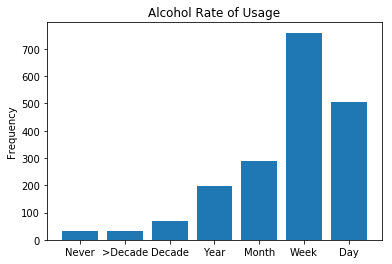

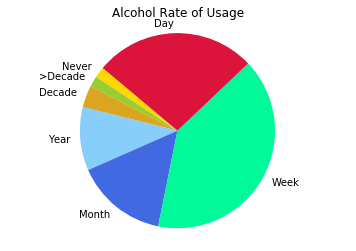

In [17]:
#Create Alcohol bar plot and pie chart
printFreqPlot(alcoholCounts, 'Alcohol')
printPieChart(alcoholPercents, 'Alcohol')

Alcohol
---------

The exploratory analysis of alcohol reavealed that most patricipants use the substance, and at a fairly frequent rate. This fits into our societal understanding as social drinking is commonplace, and alcohol itself is not considered illicit. The drop between daily and weekly use though may be significant however, as daily drinking can be a signal of addiciton, while weekly drinking is seen as more acceptable.


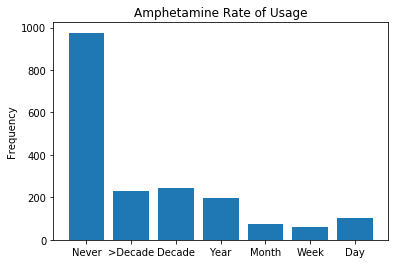

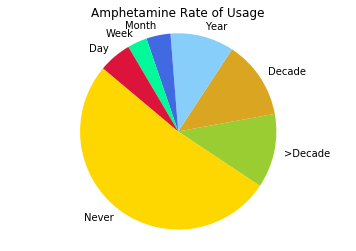

In [18]:
#Create Amphetamine bar plot and pie chart
printFreqPlot(methCounts, 'Amphetamine')
printPieChart(methPercents, 'Amphetamine')

Amphetamine
----------------

Amphetamine results at the surface appear to show low levels of use across the board with a high number of participants responding that they have never used it. However, we do see slightly higher levels in the over a decade ago, int the last decade, and in the last year categories. This may be due to amphetamines being used as a study aid, which would indicate prior use while participants were in school. Additionally, the difference in monthly, weekly, and daily use may be attributed to amphetamine being a key part of ADHD medication, which some participants may be prescribed.

https://www.mayoclinic.org/drugs-supplements/dextroamphetamine-and-amphetamine-oral-route/description/drg-20071758

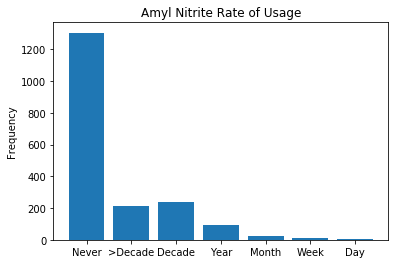

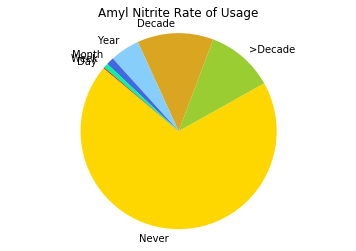

In [19]:
#Create Amyl Nitrite bar plot and pie chart
printFreqPlot(amylCounts, 'Amyl Nitrite')
printPieChart(amylPercents, 'Amyl Nitrite')

Amyl Nitrite
--------------

Amyl Nitrite is a drug used to treat hypertension and heart disease, it can also be inhaled as a psychoactive drug, which has lead to it being abused. Based on this information our analysis shows high rates of partcipants responding that they have never used it, with varied responses between over a decade ago, in the last decade, and in the last year. Whether this usage is recreational or medicinal is unknown.

https://www.drugbank.ca/drugs/DB01612

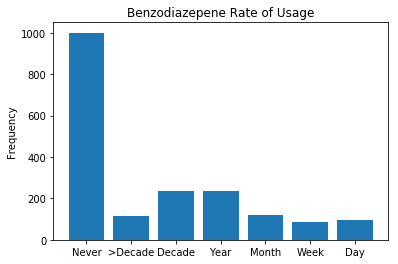

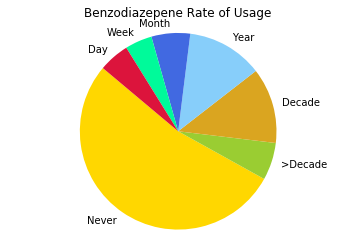

In [20]:
#Create Benzodiazepene bar plot and pie chart
printFreqPlot(benzoCounts, 'Benzodiazepene')
printPieChart(benzoPercents, 'Benzodiazepene')

Benzodiazepene
--------------------

Benzodiazepenes showed similar frequency trends when compared to other more intense substances found in the dataset, with most participants responding that they have never used them. One interesting aspect of the data is that the usage in the last deacade and year, while no concrete conclusions can be made, one possible explanation is that benzodiazepenes are used to treat anxiety disorders, which some participants may have been suffering from at some point.

https://www.mayoclinic.org/diseases-conditions/anxiety/diagnosis-treatment/drc-20350967

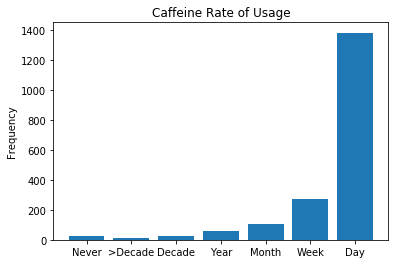

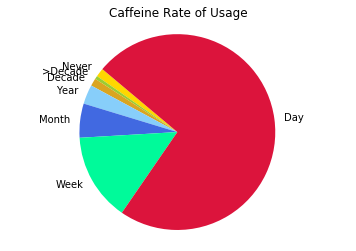

In [21]:
#Create Caffeine bar plot and pie chart
printFreqPlot(caffeineCounts, 'Caffeine')
printPieChart(caffeinePercents, 'Caffeine')

Caffeine
----------

Caffeine is an incredibly common substance that can be found in many foods and drinks that are consumed by most people daily. This can be seen in the data where the highest response is in the daily category, with the second highest being weekly. With how commonplace coffee and energy drinks have become in daily life, this is not surprising.


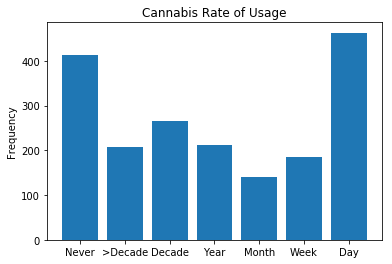

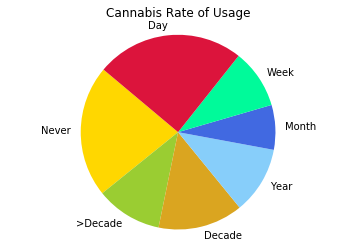

In [22]:
#Create Cannabis bar plot and pie chart
printFreqPlot(weedCounts, 'Cannabis')
printPieChart(weedPercents, 'Cannabis')

Cannabis
-----------

Cannabis is an interesting drug as it has seen prospective shifts over the last decade in both social perception, and legality. Marijuana has been shown to have medical benefits in certain contexts and has been a recreational drug for a very long time. It is also something that is often associated with youth which may explain the varied usage over time. Overall this is an interesting substance as it shows the shifting landscape and scope this drug is under.


https://www.mayoclinic.org/drugs-supplements-marijuana/art-20364974

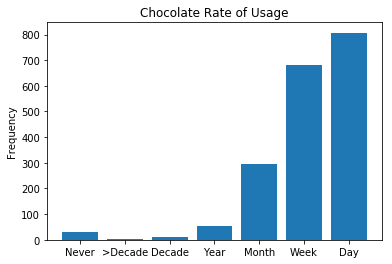

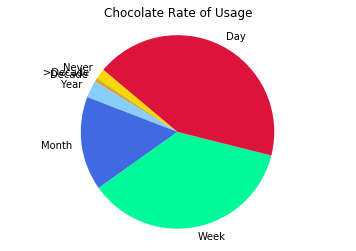

In [23]:
#Create Chocolate bar plot and pie chart
printFreqPlot(chocCounts, 'Chocolate')
printPieChart(chocPercents, 'Chocolate')

Chocolate
------------

Chocolate is obviously different than a lot of other substances on this list, as it is simply a food and not something that one would traditionally classify as a drug. That being said, many people often have a difficult relationship with food, and weight management can be a problem. Regardless, we found the frequency of consumption to be expected at these rates with daily and weekly being the highest since, lets be honest, who doesn't enjoy some chocolate from time to time. 

https://www.health.harvard.edu/blog/can-you-become-addicted-to-chocolate-201302145903

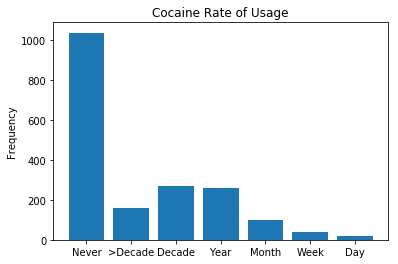

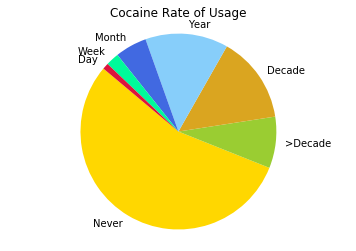

In [24]:
#Create Cocaine bar plot and pie chart
printFreqPlot(cokeCounts, 'Cocaine')
printPieChart(cokePercents, 'Cocaine')

Cocaine
----------

The initial analysis of cocaine found that most participants responded by saying they never used it, with a small subsection stating they have used it within the last decade, or last year. Cocaine is drug that is sometimes used recreationally in certain social circles. That being said there are a multitude of health risks associated with it that may be a natural deterrent.

https://www.drugabuse.gov/publications/drugfacts/cocaine

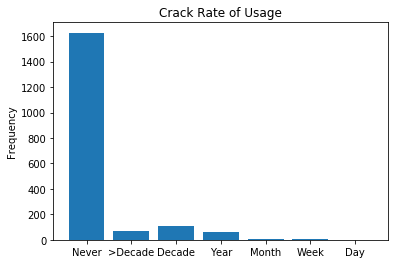

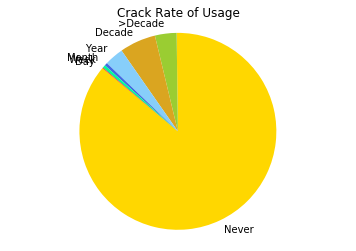

In [25]:
#Create Crack bar plot and pie chart
printFreqPlot(crackCounts, 'Crack')
printPieChart(crackPercents, 'Crack')

Crack
-------

Crack is a detrivative of cocaine made through the introduction of additional ingredients. It is well known to be a very harsh drug with extremely addictive properties and intense effects on the body. This severity can be seen in our analysis where the vast majority of participants repsonded that they have never used the drug.

https://web.archive.org/web/20080622214514/http://www.usdoj.gov/dea/concern/cocaine.html

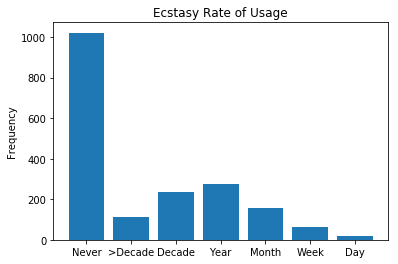

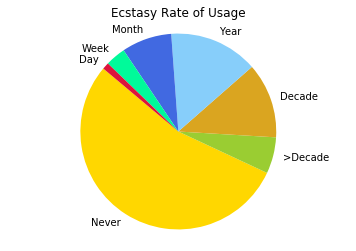

In [26]:
#Create Ecstasy bar plot and pie chart
printFreqPlot(ecstasyCounts, 'Ecstasy')
printPieChart(ecstasyPercents, 'Ecstasy')

Ecstasy
---------

Ecstasy is both a stimulant and hallucinogenic drug that alters mood and spatial perception. It is sometimes used recreationally in certain social circles and depending on the environment. This is again reflected in our analysis where we can see that some participants had used the drug some time in the last decade, even though the majority did not use the drug ever.

https://www.drugabuse.gov/publications/drugfacts/mdma-ecstasymolly

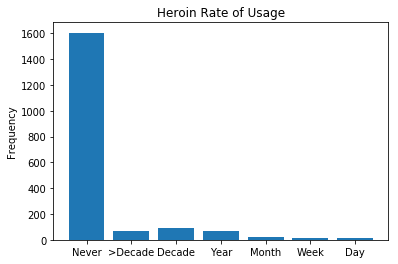

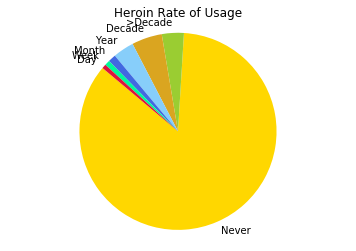

In [27]:
#Create Heroin bar plot and pie chart
printFreqPlot(heroinCounts, 'Heroin')
printPieChart(heroinPercents, 'Heroin')

Heroin
--------

Heroin is an opiod drug that is ingested through a variety of methods to produce euphoric effects. It is also considered highly addictive which has lead to abuse by many of those that use it. Through our analysis we see very low rates of use overall, with the highest category being never used by far.


https://www.drugabuse.gov/publications/drugfacts/heroin

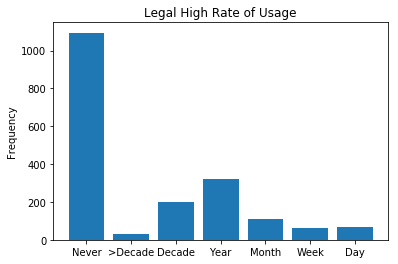

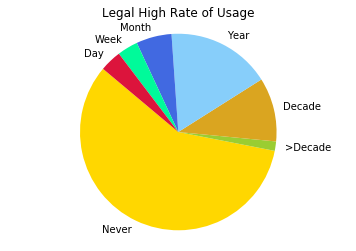

In [28]:
#Create Legal High bar plot and pie chart
printFreqPlot(legalCounts, 'Legal High')
printPieChart(legalPercents, 'Legal High')

Legal High
------------

Legal highs can be seen as synthetic drugs that are sold legally and can produce a variety of effects and are often abused. Since they are sold legally they are easier to obtain which makes usage rates more variable. This is seen in our analysis where most responses are for never used but we see an almost normal distribution spread across the other responses. Again its legal status may make the rates of use higher.

https://www.bbc.com/news/uk-32857256

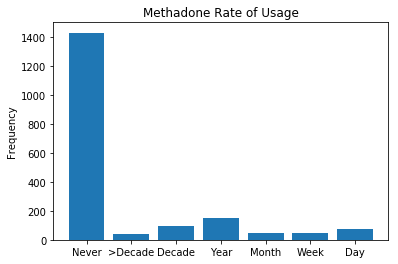

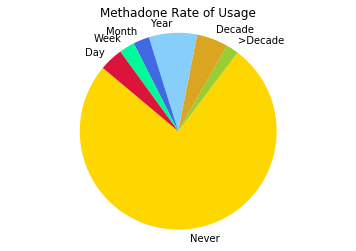

In [29]:
#Create Methadone bar plot and pie chart
printFreqPlot(methadoneCounts, 'Methadone')
printPieChart(methadonePercents, 'Methadone')

Methadone
-------------

Methadones analysis shows the majority of responses saying that they have never used the drug with a very small number saying they have. This could potentially be due to its relationship with heroin and meth as a drug used to treat withdrawl symptoms.

https://www.samhsa.gov/medication-assisted-treatment/treatment/methadone

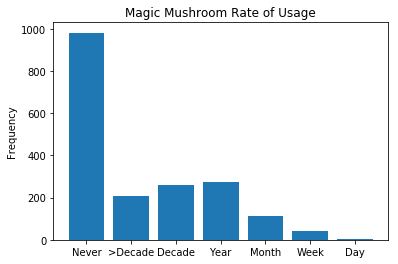

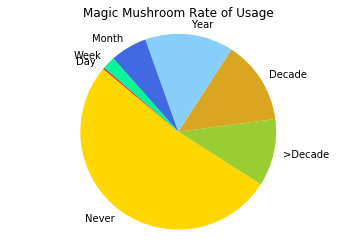

In [30]:
#Create Magic Mushroom bar plot and pie chart
printFreqPlot(shroomCounts, 'Magic Mushroom')
printPieChart(shroomPercents, 'Magic Mushroom')

Magic Mushrooms
----------------------

Magic Mushrooms see results similar to ecstacy where the majority of repsonses are never used, but there are a decent number of responses spread between the greater than a decade ago, in the last decade, and in the last year categories. This may be due the experimental aspects of magic mushrooms as a hallucinagenic drug sometimes used recreationally. Some states have even began to legalize magic mushrooms, along with certain other countries.

https://en.wikipedia.org/wiki/Legal_status_of_psilocybin_mushrooms

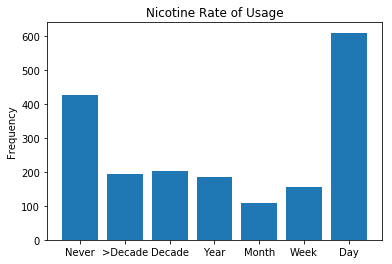

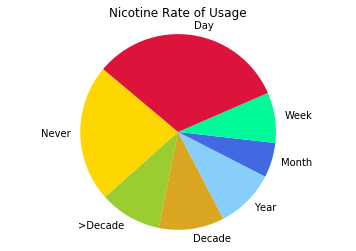

In [31]:
#Create Nicotine bar plot and pie chart
printFreqPlot(nicotineCounts, 'Nicotine')
printPieChart(nicotinePercents, 'Nicotine')

Nicotine
----------

Nicotine is a substance commonly found in cigarettes, vapes, nicotine patches, and gums. This is a very common addiciton many people find themselves with, where daily use is common. Many smoking alternatives have been introduced which has changed the way nicotine is seen. Additionally, misconceptions often occur between the health effects of nicotine in relation to the other health effects of cigarettes. Our analysis also shows this commonality where we see a high number of daily users, with scattered responses in other categories besides never, where we also see another high number of responses. This may be due to users choosing to quit over time.


https://www.mayoclinic.org/diseases-conditions/nicotine-dependence/symptoms-causes/syc-20351584

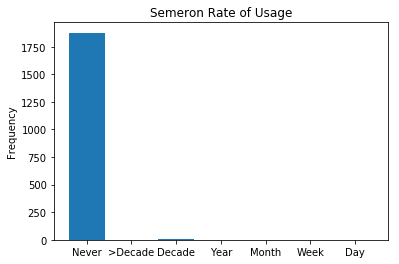

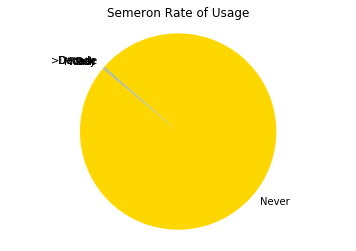

In [32]:
#Create Semeron bar plot and pie chart
printFreqPlot(placeboCounts, 'Semeron')
printPieChart(placeboPercents, 'Semeron')

Semeron
-----------

Semeron is a fictitous drug added to the study to check the rate of false responses. We found this to be effective as almost all of the reponders said they had never used the drug. 


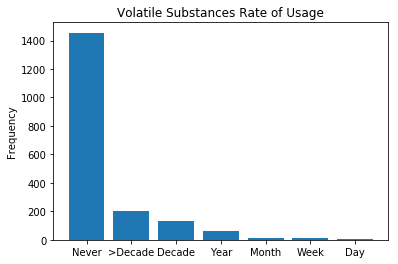

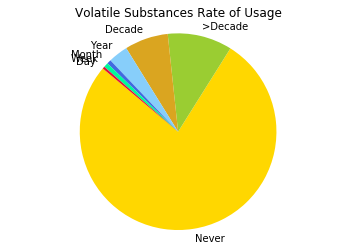

In [33]:
#Create Volatile Substances bar plot and pie chart
printFreqPlot(volatileCounts, 'Volatile Substances')
printPieChart(volatilePercents, 'Volatile Substances')

Volatile Substances
-----------------------

Volatile substances is an umbrella category used to capture other substances such as inhalents, glue, paints, etc. Some of these substances can produce euphoria and can be addictive in certain doses. While not very common, we can see this reflected in our analysis where a vast majority of the responses were never used, while a small number tapers down from greater than a decade to in the last year.

https://www.ncbi.nlm.nih.gov/pubmed/7866398


Exploratory Analysis Summary
------------------------------------

Based on the above analysis we can begin to see some trends appearing throughout our data. Some drugs seems to fall into different categories of intensity that change the rates at which they are used. More common substances such as chocolate, alcohol, and nicotine see daily use while substances such as heroin and crack have very low rates of use. Some of the above substances have medical uses which may explain some trends, and others fall into sparse use categories such as magic mushrooms, ecstacy, and marijuana where they see scattered responses across several different categories. Based on this initial analysis we will now use the information gleaned in addition to the provided personality traits to establish connections between specified attributes and drug consumption. The main focus of these personality traits will be impulsivity, with a focus on caffeine, cannabis, and volatile substances. 

## Impulsivity on Caffeine, Cannabis, and Volatile Substances

To start with, we analyzed the effect of impulsiveness on drug consumption by plotting participants’ impulsiveness scores against their reported use of a certain drug as a means of visualizing the data so we could examine how impulsivity may differ across 'common-use', 'medium-use', and 'rare-use' drugs, in this case Caffeine, Cannabis, and Volatile Substances respectively.

Consumption Scores: 1 = never used;
2 = used over a decade ago;
3 = used in last decade;
4 = used in last year;
5 = used in last month;
6 = used in last week;
7 = used in last day

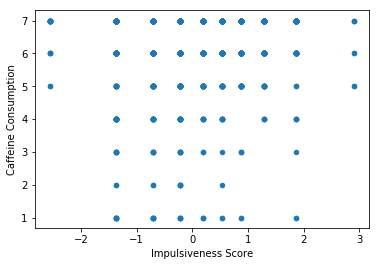

In [34]:
scatter_caffeine = drug_df.plot.scatter(x='Impulsiveness Score', y='Caffeine Consumption')

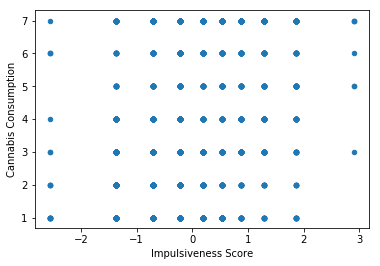

In [35]:
scatter_cannabis = drug_df.plot.scatter(x='Impulsiveness Score', y='Cannabis Consumption')

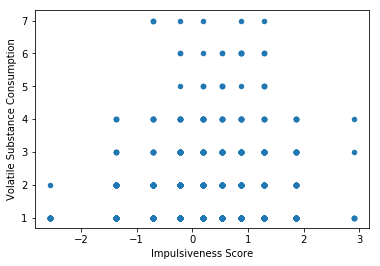

In [36]:
scatter_volatile = drug_df.plot.scatter(x='Impulsiveness Score', y='Volatile Substance Consumption')

## Personality Scores on Frequent Caffeine, Cannabis, and Volatile Substance Users

To explore the overall personality of the average daily drug user within the aforementioned drug categories, we used box plots to visualize their personality scores (neuroticism, extraversion, openness, agreeableness, conscientiousness, impulsiveness, and sensation seeking).

In [37]:
#Setting up for drug boxplots
personality_cols = ['Neuroticism Score', 'Extraversion Score',
                  'Openness Score', 'Agreeableness Score', 'Conscientiousness Score', 'Impulsiveness Score',
                  'Sensation Seeking Score']

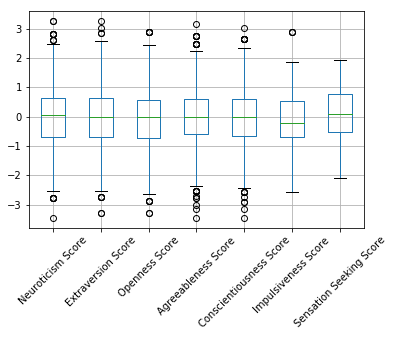

In [38]:
# Personality scores for daily caffeine user
boxplot_caffeine_7 = drug_df.loc[drug_df['Caffeine Consumption'] == 7].boxplot(rot=45, column=personality_cols)

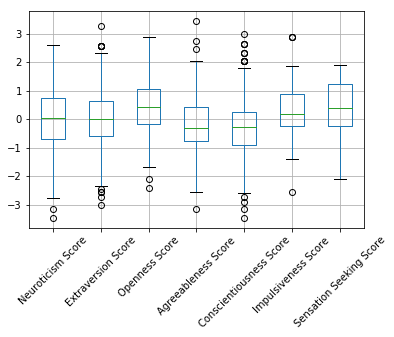

In [39]:
# Personality scores for daily cannabis user
boxplot_cannabis_7 = drug_df.loc[drug_df['Cannabis Consumption'] == 7].boxplot(rot=45, column=personality_cols)

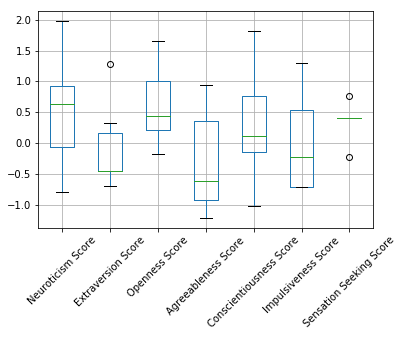

In [40]:
# Personality scores for daily volatile substance user
boxplot_volatile_7 = drug_df.loc[drug_df['Volatile Substance Consumption'] == 7].boxplot(rot=45, column=personality_cols)

## Linear Regressions predicting Impulsivity from Drug Use

In [41]:
#Setting up for linear regressions predicting impulsivity from rate of a specific drug's consumption
analytic_df = drug_df[['Impulsiveness Score', 'Volatile Substance Consumption','Cannabis Consumption',
                       'Caffeine Consumption', 'Alcohol Consumption', 'Chocolate Consumption', 
                       'Nicotine Consumption', 'Heroin Consumption', 'Cocaine Consumption']].copy()
analytic_df.columns = ['IS','VSC','CanC','CafC', 'AlcC', 'ChocC', 'NicoC', 'HeroC', 'CokeC']

In [42]:
# Linear regressions on impulsivity for 'common-use' drugs 
# (alcohol, caffeine, chocolate)
outcome, predictors = patsy.dmatrices('IS ~ AlcC', analytic_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

outcome, predictors = patsy.dmatrices('IS ~ CafC', analytic_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

outcome, predictors = patsy.dmatrices('IS ~ ChocC', analytic_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     IS   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.988
Date:                Wed, 12 Jun 2019   Prob (F-statistic):             0.0460
Time:                        20:21:45   Log-Likelihood:                -2584.3
No. Observations:                1885   AIC:                             5173.
Df Residuals:                    1883   BIC:                             5184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1785      0.096     -1.868      0.0

In [43]:
# Linear regressions on impulsivity for 'middle-use' drugs 
# (cannabis, nicotine)
outcome, predictors = patsy.dmatrices('IS ~ CanC', analytic_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

outcome, predictors = patsy.dmatrices('IS ~ NicoC', analytic_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     IS   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.04e-43
Time:                        20:21:45   Log-Likelihood:                -2490.7
No. Observations:                1885   AIC:                             4985.
Df Residuals:                    1883   BIC:                             4997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5097      0.042    -12.127      0.0

In [44]:
# Linear regressions on impulsivity for 'rare-use' drugs 
# (cocaine, heroin, volatile substances)
outcome, predictors = patsy.dmatrices('IS ~ CokeC', analytic_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

outcome, predictors = patsy.dmatrices('IS ~ HeroC', analytic_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

outcome, predictors = patsy.dmatrices('IS ~ VSC', analytic_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     IS   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.65e-30
Time:                        20:21:45   Log-Likelihood:                -2520.3
No. Observations:                1885   AIC:                             5045.
Df Residuals:                    1883   BIC:                             5056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3473      0.037     -9.379      0.0

## Analysis Summary

For our initial analysis, we used scatter plots to visualize the effect of impulsiveness on the consumption of caffeine, representative of common-use drugs; cannabis, representative of medium-use drugs; and volatile substances, representative of rare-use drugs. We found that users of caffeine were more likely to be a frequent user if they either had low impulsivity or high impulsivity. For users with near baseline impulsiveness scores, there appeared to be no correlation. For cannabis, we observed a slight trend in which participants with very high impulsivity were more likely to be a frequent cannabis user than an infrequent user or non-user. For volatile substances, we surprisingly found that frequent users were more likely to have near baseline impulsiveness scores. Additionally, participants with very low or very high impulsivity were more likely to be infrequent users or non-users.

Moving forward, we used box plots to look at the personality profile for the average frequent drug user. As we moved from common-use drugs to rare-use drugs, we found that the variance in personality scores increased. Frequent users of caffeine had near baseline scores for all personality attributes, while frequent cannabis users often scored higher on openness, impulsiveness, and sensation seeking. Meanwhile, most frequent users of volatile substances scored notably lower on extraversion and agreeableness, and higher on neuroticism, openness, conscientiousness, and sensation seeking.

To answer our research question, we decided to use single linear regressions to analyze the correlation, if any, between various drugs and the impulsiveness scores. We split the regressions into groups categorized by their frequency of usage. The three groups are split into common-use, mid-use, and rare-use based upon if the drugs were used at some point more than they were never used by the participants, if the use and lack of use was equal, or if the lack of use was more apparent than the use of the drug, respectively. We decided to only use select data to represent all other drugs that would fall into one of the three categories. Thus, we see common-use drugs includes alcohol, caffeine, and chocolate, mid-use drugs includes cannabis and nicotine, and rare-use drugs includes cocaine, heroin, and volatile substances. These categories also represent various other drugs that would otherwise fall in one of the three categories. 

The first set of regressions deals with common-use drugs, in which we see the highest correlation between impulsivity and caffeine at 0.04, followed by alcohol at 0.03, and tied up with chocolate at 0.01. The second set of regressions showed that cannabis was correlated to impulsivity at a higher value of 0.13, while the nicotine regression gavea a value of 0.09. Finally, the rare-use drugs category regressions gave values of 0.182, 0.179, and 0.164 for heroin, volatile substances, and cocaine, respectively. All of these correlation values were found to be statistically significant within the standard alpha level of 0.05 (P < 0.05) except for chocolate, which we then discard as a statistically insignificant effect.

All of the regressions were statistically significant, showing a correlation between impulsivity and each drug with a p-value < 0.05, which gives validation to the consistency of trends found among specific drugs as well as trends found overarching the whole database.

# Ethics & Privacy

The data set is provided by the University of California Irvine Machine Learning Repository which is an open source database that provides collected data sets to anyone interested. For acknowledgement, we have obtained a citation provided by the repository that will give credit to the school for providing us with the initial data set. 

The other primary concern we are faced with is prevalent when dealing with any patient or participant information in regards to anonymity. To combat this, much of the identifying personal participant information has already been removed from the data set by the researchers before it was added to the repository. The dataset in its original state already follows all of the protective privacy standards of the Safe Harbour Method, which we conclude to be sufficient in regards to preserving subject anonymity. Therefore, in terms of privacy, we find it unnecesasry to further prune and obscure the existing participant demographic data within the dataset.

Finally, there exists a potential bias in that the majority of the study’s subjects are predominantly Caucasian with a college education. Unfortunately, while this means any conclusions we draw may not be generalizable to all populations, it is a bias we  kept in mind when interpreting our results.

# Conclusion & Discussion

Our project first set out to see if there was any link between a person’s impulsivity and their drug habits. In doing so, we first visualized the data to see how personality scores, particularly impulsivity, differed amongst the spread of consumption levels for a select few ‘drugs of interest’ we had selected. The selections were not arbitrary but based on how commonly the drugs were used across participants, with Caffeine representing ‘common-use’ drugs, Cannabis representing ‘medium-use’ drugs, and Volatile Substances representing ‘rare-use’ drugs. By making these distinctions, we hoped to see how impulsivity scores differed not only between specific drugs but across categories such that general trends could be seen between populations more likely to use rarer drugs. When looking at the linear regression data for each drug we tested, we found that the results were statistically significant and that impulsivity was positively correlated with higher levels of consumption across the board (excluding Chocolate, suggesting that Chocolate consumption tells us nothing about its user's impulsivity). Even more telling was that drugs within their respective categories tended to share a close level of correlation, or increase in predicted impulsivity with each ascending level of consumption, while each rarer category of drugs saw a significant spike in the general range of correlations they fell in. More specifically, common-use drugs had weak positive correlations, medium-use drugs had correlations around triple that amount, and rarer-use drugs had correlations around quadruple the amount common-use drugs had or higher. This means that the ‘rarer’ a drug is and the more an individual consumes it, the more likely they are to be much more impulsive than someone consuming an equivalent amount of a more ‘common’ drug.
   
There could be a multitude of reasons that these correlations exist, though they all rely on assumptions we cannot verify through data in the scope of this project. Rarer drugs are most likely rarer not only because of availability but because of the unwillingness of people to try drugs that are more harmful, as ‘hard’ drugs like Cocaine and Heroin had far fewer users than Caffeine, an unsurprising observation. However, it may not be so clear cut as to say that people who are more impulsive are more likely to consume such rarer and often riskier drugs when it may be that people who do consume such drugs in larger quantities are affected by them and become more impulsive through using them. Another factor to consider is a drug’s ‘social acceptability’ within a given culture, and since most of the subjects resided in Western cultures, we saw observations consistent with our own expectations as a team living in aforementioned culture between the high daily use of Cannabis, despite its classification as a Schedule I drug still in many U.S. states, and the almost non-existent daily use of Volatile Substances despite their ubiquity, as that drug group included substances like glue and paint.

Within society, some viewpoints contend that a drug's intensity and classification determine just how socially acceptable it is to partake in them, and how socially deviant a person must be to partake in ones that are harsher than those that are socially accepted. However, we see a clear mismatch here in the case of Alcohol, where its effects would be considered worse and more intoxicating than Caffeine, yet it is less strongly correlated with a subject's impulsivity than Caffeine is. We hope that our results will help dispel some of these assumptions that a drug's intensity prescribes its user's social status when it may be that a society's expectations makes certain kinds of people more likely to consume a drug, regardless of its intensity, in the first place.